In [1]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

2nd order ODE:
$$\frac{\text{d}^{2}\phi}{\text{d}t^{2}}=-\omega_{0}^{2}\sin{\phi}-2\beta\frac{\text{d}\phi}{\text{d}t}+\gamma\omega_{0}^{2}\cos{\left(\omega t\right)}$$

Two 1st order ODEs:
\begin{align}
    \frac{\text{d}\phi}{\text{d}t}&=\zeta \\
    \frac{\text{d}\zeta}{\text{d}t}&=-\omega_{0}^{2}\sin{\phi}-2\beta\zeta+\gamma\omega_{0}^{2}\cos{\left(\omega t\right)}
\end{align}

In [2]:
### Constants

omega = 2 * pi
omega0 = 1.5 * omega
beta = omega0 / 4

A = omega0 ** 2
B = -2 * beta

dt = 1e-3 / 2 #Time step

In [3]:
### 4th Order Runge-Kutta Method

def zeta(t0, zeta0):
    return (-A * np.sin(phi0)) + (B * zeta0) + (gamma * A * np.cos(omega * t0))

def solve(zeta, t0, phi0, zeta0):
    tmid = t0 + (dt / 2)
    t1 = t0 + dt
    
    phi1 = phi0 + (dt * zeta0)
    
    k1 = dt * zeta(t0, zeta0)
    k2 = dt * zeta(tmid, zeta0 + (k1 / 2))
    k3 = dt * zeta(tmid, zeta0 + (k2 / 2))
    k4 = dt * zeta(t1, zeta0 + k3)
    
    zeta1 = zeta0 + ((k1 + (2 * k2) + (2 * k3) + k4) / 6)
    
    return t1, phi1, zeta1

In [4]:
### Bifurcation Plot Calculation

# This block of code has been commented out as it takes a long time to run.
# The data produced by the code has been saved in text files and used in the next cell to plot the bifuraction diagram.
"""
plot_values = [[], []]

for g in range(10600, 10850):
    gamma = g / 10000
    print(f'\nGamma value: {gamma}')

    #Initial conditions
    t0 = 0
    phi0 = - pi / 2
    zeta0 = 0

    i = 0
    while t0 < 600:
        if i % (100 / dt) == 0:
            print(f'{int(i * (dt / 100))}/6 completed')
        i += 1
        
        t0, phi0, zeta0 = solve(zeta, t0, phi0, zeta0)
        
        if t0 > 500 and i % (1 / dt) == 0:
            plot_values[0].append(gamma)
            plot_values[1].append(phi0)
            
np.savetxt('gamma_and_phi.txt', plot_values)
"""

"\nplot_values = [[], []]\n\nfor g in range(10600, 10850):\n    gamma = g / 10000\n    print(f'\nGamma value: {gamma}')\n\n    #Initial conditions\n    t0 = 0\n    phi0 = - pi / 2\n    zeta0 = 0\n\n    i = 0\n    while t0 < 600:\n        if i % (100 / dt) == 0:\n            print(f'{int(i * (dt / 100))}/6 completed')\n        i += 1\n        \n        t0, phi0, zeta0 = solve(zeta, t0, phi0, zeta0)\n        \n        if t0 > 500 and i % (1 / dt) == 0:\n            plot_values[0].append(gamma)\n            plot_values[1].append(phi0)\n            \nnp.savetxt('gamma_and_phi.txt', plot_values)\n"

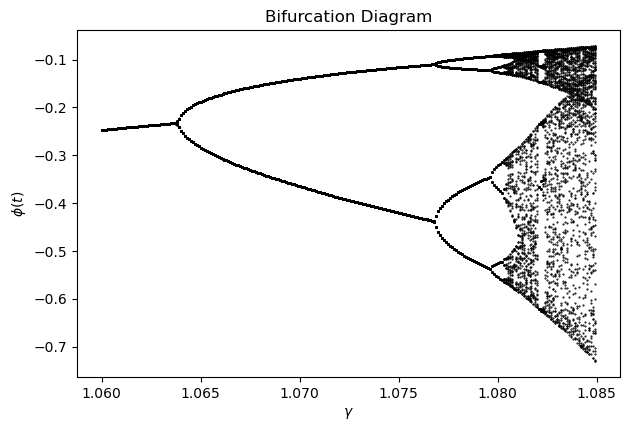

In [5]:
## Bifurcation Diagram

bifurcation_data = np.loadtxt('gamma_and_phi.txt')

plt.figure(figsize = (7, 4.5))
plt.title('Bifurcation Diagram')
plt.xlabel('$\\gamma$')
plt.ylabel('$\\phi(t)$')
plt.plot(bifurcation_data[0], bifurcation_data[1], 'k.', markersize=1)
plt.show()

In [6]:
### Phase Space Diagrams

dt = 1e-5
gammas = [1.0810, 1.0845, 1.0840]
gammas_data = []

for i in range(len(gammas)):
    gamma = gammas[i]
    print(f'\nGamma value: {gamma}')
    #Initial conditions
    t0 = 0
    phi0 = - pi / 2
    zeta0 = 0

    plot_values = [[], []]
    
    j = 0
    while t0 < 30:
        if t0 > j:
            print(f'{j}/30 completed')
            j += 1
        
        t0, phi0, zeta0 = solve(zeta, t0, phi0, zeta0)
        
        if t0 > 15:
            plot_values[0].append(phi0)
            plot_values[1].append(zeta0)
    print(f'{j}/30 completed')
    
    gammas_data.append(plot_values)


Gamma value: 1.081
0/30 completed
1/30 completed
2/30 completed
3/30 completed
4/30 completed
5/30 completed
6/30 completed
7/30 completed
8/30 completed
9/30 completed
10/30 completed
11/30 completed
12/30 completed
13/30 completed
14/30 completed
15/30 completed
16/30 completed
17/30 completed
18/30 completed
19/30 completed
20/30 completed
21/30 completed
22/30 completed
23/30 completed
24/30 completed
25/30 completed
26/30 completed
27/30 completed
28/30 completed
29/30 completed
30/30 completed

Gamma value: 1.0845
0/30 completed
1/30 completed
2/30 completed
3/30 completed
4/30 completed
5/30 completed
6/30 completed
7/30 completed
8/30 completed
9/30 completed
10/30 completed
11/30 completed
12/30 completed
13/30 completed
14/30 completed
15/30 completed
16/30 completed
17/30 completed
18/30 completed
19/30 completed
20/30 completed
21/30 completed
22/30 completed
23/30 completed
24/30 completed
25/30 completed
26/30 completed
27/30 completed
28/30 completed
29/30 completed
30/

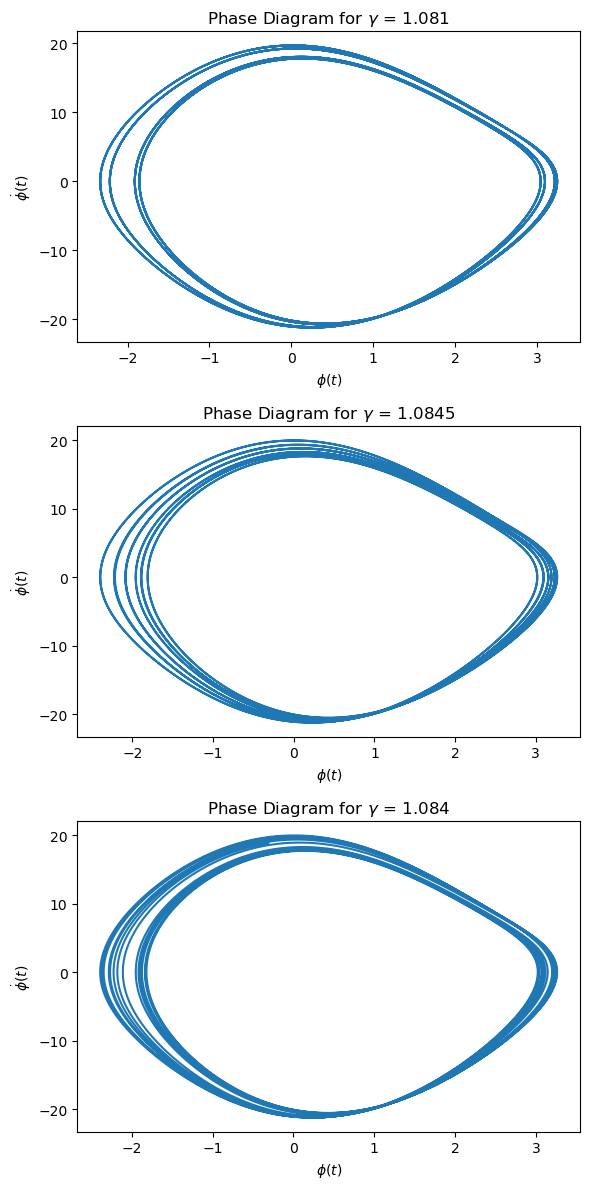

In [7]:
fig, axs = plt.subplots(3, 1, figsize = (6, 12))
axs[0].plot(gammas_data[0][0], gammas_data[0][1])
axs[0].set_title(f'Phase Diagram for $\gamma$ = {gammas[0]}')
axs[0].set_xlabel('$\\phi(t)$')
axs[0].set_ylabel('$\dot{\phi}(t)$')
axs[1].plot(gammas_data[1][0], gammas_data[1][1])
axs[1].set_title(f'Phase Diagram for $\gamma$ = {gammas[1]}')
axs[1].set_xlabel('$\\phi(t)$')
axs[1].set_ylabel('$\dot{\phi}(t)$')
axs[2].plot(gammas_data[2][0], gammas_data[2][1])
axs[2].set_title(f'Phase Diagram for $\gamma$ = {gammas[2]}')
axs[2].set_xlabel('$\\phi(t)$')
axs[2].set_ylabel('$\dot{\phi}(t)$')
fig.tight_layout()

In [8]:
### Constants 2

omega = 1
omega0 = 1
beta = .1
gamma = 1.66

A = omega0 ** 2
B = -2 * beta

dt = 1e-3 #Time step

In [9]:
### Basins of Attraction Plot Calculation

# This block of code has been commented out as it takes a long time to run.
# The data produced by the code has been saved in text files and used in the next cell to plot the basins of attraction.
"""
points = [[[], []], [[], []], [[], []]]

#Some approximate values to determine the three steady states
zeta_low = -1.7
zeta_upp = -1.3
    
for x in range(-300, 300, 2):
    x /= 100
    print(f'{round(100 * (x - (-3.0))/(6), 2)}%')
    
    for xdot in range(-200, 400, 2):
        xdot /= 100
        
        #Initial conditions
        t0 = 0
        phi0 = x
        zeta0 = xdot
        
        while t0 < 60:
            t0, phi0, zeta0 = solve(zeta, t0, phi0, zeta0)
    
        if zeta0 < zeta_low:
            points[0][0].append(x)
            points[0][1].append(xdot)
        elif zeta0 > zeta_upp:
            points[1][0].append(x)
            points[1][1].append(xdot)
        else:
            points[2][0].append(x)
            points[2][1].append(xdot)
            
np.savetxt('red.txt', points[0])
np.savetxt('green.txt', points[1])
np.savetxt('blue.txt', points[2])
"""

"\npoints = [[[], []], [[], []], [[], []]]\n\n#Some approximate values to determine the three steady states\nzeta_low = -1.7\nzeta_upp = -1.3\n    \nfor x in range(-300, 300, 2):\n    x /= 100\n    print(f'{round(100 * (x - (-3.0))/(6), 2)}%')\n    \n    for xdot in range(-200, 400, 2):\n        xdot /= 100\n        \n        #Initial conditions\n        t0 = 0\n        phi0 = x\n        zeta0 = xdot\n        \n        while t0 < 60:\n            t0, phi0, zeta0 = solve(zeta, t0, phi0, zeta0)\n    \n        if zeta0 < zeta_low:\n            points[0][0].append(x)\n            points[0][1].append(xdot)\n        elif zeta0 > zeta_upp:\n            points[1][0].append(x)\n            points[1][1].append(xdot)\n        else:\n            points[2][0].append(x)\n            points[2][1].append(xdot)\n            \nnp.savetxt('red.txt', points[0])\nnp.savetxt('green.txt', points[1])\nnp.savetxt('blue.txt', points[2])\n"

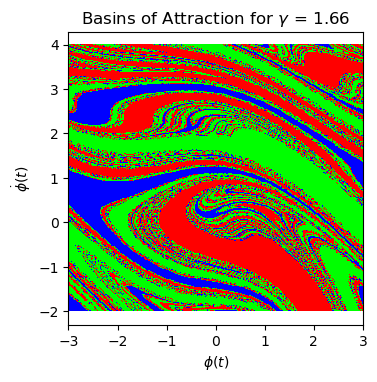

In [10]:
### Basins of Attraction Plot

datar = np.loadtxt('red.txt')
datag = np.loadtxt('green.txt')
datab = np.loadtxt('blue.txt')

plt.figure(figsize = (3.8, 3.8))
plt.title(f'Basins of Attraction for $\gamma$ = {gamma}')
plt.xlabel('$\\phi(t)$')
plt.ylabel('$\dot{\phi}(t)$')
plt.xlim([-3, 3])
plt.plot(datar[0], datar[1], ',', color = '#ff0000')
plt.plot(datag[0], datag[1], ',', color = '#00ff00')
plt.plot(datab[0], datab[1], ',', color = '#0000ff')